In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

# source venv/Scripts/activate


In [2]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 


In [3]:

# Grouped by day, country
# =======================

full_grouped = pd.read_csv(r'D:\CLASSROOM\Data Handling and Visualisation\Assignment2\data\full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
# Replace negative values in 'New deaths' and 'New recovered' with 0
full_grouped['New deaths'] = full_grouped['New deaths'].clip(lower=0)
full_grouped['New recovered'] = full_grouped['New recovered'].clip(lower=0)



# Day wise
# ========

day_wise = pd.read_csv(r'D:\CLASSROOM\Data Handling and Visualisation\Assignment2\data\day_wise.csv')
day_wise['Date'] = pd.to_datetime(day_wise['Date'])


# Country wise
# ============

country_wise = pd.read_csv(r'D:\CLASSROOM\Data Handling and Visualisation\Assignment2\data\country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
country_wise.replace([float('inf'), -float('inf')], pd.NA, inplace=True)



# Worldometer data
# ================

worldometer_data = pd.read_csv(r'D:\CLASSROOM\Data Handling and Visualisation\Assignment2\data\worldometer_data.csv')
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)


In [4]:
full_grouped.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan          0       0          0       0          0   
1 2020-01-22        Albania          0       0          0       0          0   
2 2020-01-22        Algeria          0       0          0       0          0   
3 2020-01-22        Andorra          0       0          0       0          0   
4 2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [5]:
day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [6]:
country_wise.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      27532     546       7660   19326        658          42   
1        Albania       1788      39       1086     663         66           1   
2        Algeria      11385     811       8078    2496        117          12   
3        Andorra        855      52        792      11          1           0   
4         Angola        166       8         64      94         11           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0           1502                1.98                  27.82   
1              9                2.18                  60.74   
2            135                7.12                  70.95   
3              1                6.08                  92.63   
4              0                4.82                  38.55   

  Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                   7.13                22890           4642   
1                   3.59                 1385            403   
2                  10.04                10589            796   
3                   6.57                  852              3   
4                   12.5                  118             48   

   1 week % increase             WHO Region  
0              20.28  Eastern Mediterranean  
1              29.10                 Europe  
2               7.52                 Africa  
3               0.35                 Europe  
4              40.68                 Africa

In [7]:
worldometer_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.309388e+08     2263749      98.0   
1         Brazil  South America  2.125087e+08      983359       0.0   
2         Russia         Europe  1.459326e+08      569063    7972.0   
3          India           Asia  1.379530e+09      381485     394.0   
4             UK         Europe  6.787438e+07      300469       0.0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     120688.0        0.0        931076.0          82.0    1211985.0   
1      47869.0        0.0        520360.0       16853.0     415130.0   
2       7841.0      181.0        324406.0       10443.0     236816.0   
3      12605.0        1.0        205183.0           1.0     163697.0   
4      42288.0        0.0             0.0           0.0          0.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           16503.0            6840.0          365.0  26724848.0   
1            8318.0            4627.0          225.0   2344437.0   
2            2300.0            3899.0           54.0  16321964.0   
3            8944.0             277.0            9.0   6426627.0   
4             379.0            4427.0          623.0   7259555.0   

   Tests/1M pop      WHO Region  
0       80755.0        Americas  
1       11032.0        Americas  
2      111846.0          Europe  
3        4659.0  South-EastAsia  
4      106956.0          Europe

## Summary Statistics

In [8]:
"""
Create a summary table of country-level COVID-19 severity metrics and display the
Top 10 countries by end-of-period Case Fatality Rate (CFR) as a Matplotlib table.

Workflow:
1) Copy and sort the `full_grouped` dataset by country and date to ensure correct
   time ordering for difference calculations.
2) Compute daily new cases per country using the day-to-day difference of the
   cumulative confirmed case count.
3) Aggregate country-level summary metrics:
   - max_cases: maximum cumulative confirmed cases (end-of-period level)
   - max_deaths: maximum cumulative deaths (end-of-period level)
   - peak_daily_cases: maximum daily increase in confirmed cases
4) Compute end-of-period CFR (%) for each country:
      CFR_end (%) = (max_deaths / max_cases) * 100
5) Select the Top 10 countries with the highest CFR_end (%) and render them in
   a formatted table figure.

Inputs:
- full_grouped (pd.DataFrame):
  Must include at least the columns:
  ["Country/Region", "Date", "Confirmed", "Deaths"].
  'Confirmed' and 'Deaths' are expected to be cumulative totals.

Outputs:
- summary_df (pd.DataFrame): country-level aggregated metrics with CFR_end (%).
- top_cfr_df (pd.DataFrame): top 10 countries by CFR_end (%).
- A Matplotlib figure displaying `top_cfr_df` as a table.

Notes:
- The first day for each country will have NaN in `New_cases` due to `.diff()`.
- CFR can be inflated for countries with low case counts or incomplete reporting,
  so interpret rankings with caution.
"""


# Sort the data
full_grouped_df = full_grouped.copy()
full_grouped_df = full_grouped_df.sort_values(["Country/Region", "Date"])

# Calculate new daily cases (if not already present or to be safe, recalculate)
full_grouped_df["New_cases"] = full_grouped_df.groupby("Country/Region")["Confirmed"].diff()
# Calculate new daily cases (if not already present or to be safe, recalculate)
full_grouped_df["New_cases"] = full_grouped_df.groupby("Country/Region")["Confirmed"].diff()

# Build summary table
summary_df = (
    full_grouped_df.groupby("Country/Region", as_index=False)
    .agg(
        max_cases=("Confirmed", "max"),
        max_deaths=("Deaths", "max"),
        peak_daily_cases=("New_cases", "max")
    )
)

# Compute end-of-period CFR (%)
summary_df["CFR_end (%)"] = (
    summary_df["max_deaths"] / summary_df["max_cases"] * 100
).round(1)

# Get top 10 countries by highest CFR
top_cfr_df = summary_df.sort_values("CFR_end (%)", ascending=False).head(10)

# Plot the summary table as a figure
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.axis("off")

tbl = ax.table(
    cellText=top_cfr_df.values,
    colLabels=top_cfr_df.columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.1, 1.5)

plt.title("Table 1:Top 10 Countries by COVID-19 Fatality Rate (CFR%)", fontsize=12, weight='bold')
plt.tight_layout()

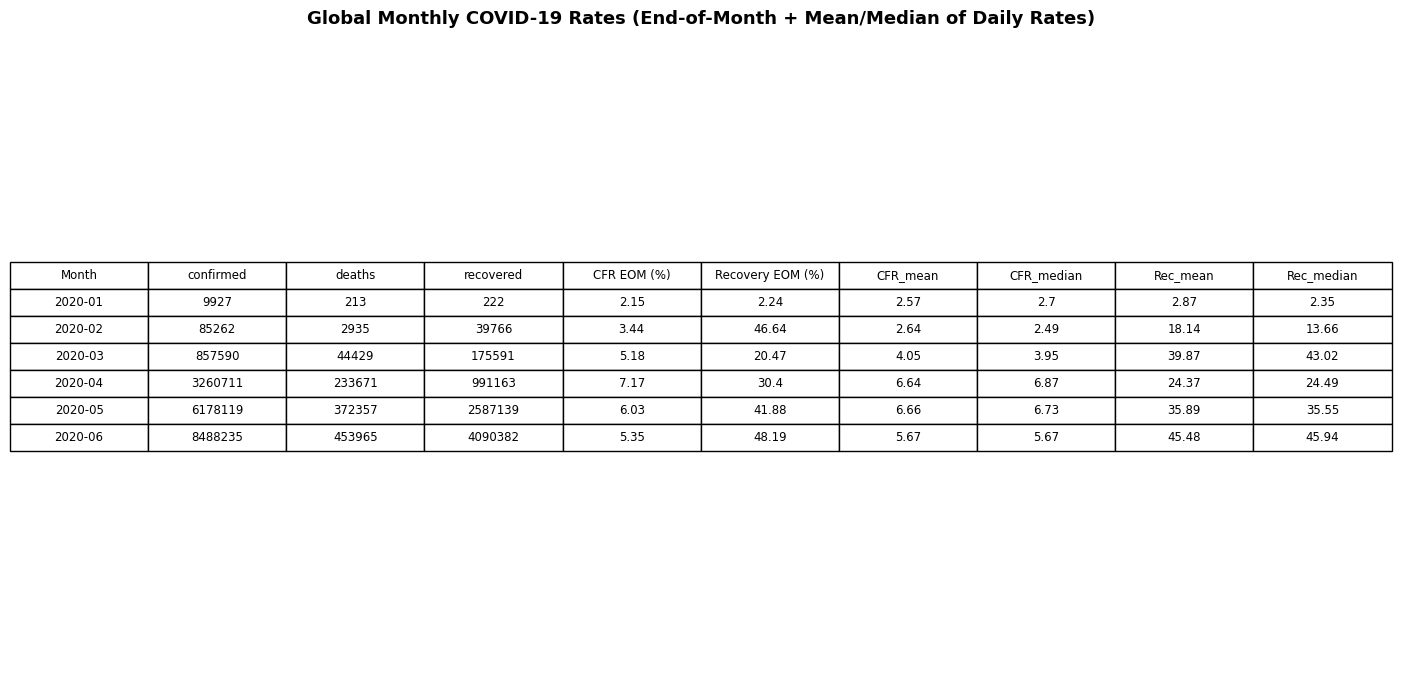

Month  confirmed  deaths  recovered  CFR EOM (%)  Recovery EOM (%)  \
0  2020-01       9927     213        222         2.15              2.24   
1  2020-02      85262    2935      39766         3.44             46.64   
2  2020-03     857590   44429     175591         5.18             20.47   
3  2020-04    3260711  233671     991163         7.17             30.40   
4  2020-05    6178119  372357    2587139         6.03             41.88   

   CFR_mean  CFR_median  Rec_mean  Rec_median  
0      2.57        2.70      2.87        2.35  
1      2.64        2.49     18.14       13.66  
2      4.05        3.95     39.87       43.02  
3      6.64        6.87     24.37       24.49  
4      6.66        6.73     35.89       35.55

In [9]:
"""
Compute and display global monthly COVID-19 summary statistics (end-of-month totals and rate summaries).

This code takes a daily global COVID-19 dataset (with cumulative counts), cleans and formats it, then
derives monthly-level indicators including:
1) End-of-month (EOM) cumulative totals for confirmed cases, deaths, and recoveries.
2) End-of-month Case Fatality Rate (CFR) and Recovery Rate.
3) Monthly mean and median of *daily* CFR and Recovery Rate, computed from daily cumulative totals.

Workflow:
- Convert the 'Date' column to datetime and coerce invalid values to NaT.
- Convert 'Confirmed', 'Deaths', and 'Recovered' columns to numeric and coerce invalid values to NaN.
- Remove rows with missing dates.
- Create a 'YearMonth' period column for month-based grouping.
- Compute daily CFR (%) and daily Recovery Rate (%) as:
    Daily CFR (%) = Deaths / Confirmed * 100
    Daily Recovery Rate (%) = Recovered / Confirmed * 100
- Aggregate by month to get end-of-month totals using the maximum cumulative values within each month.
- Compute end-of-month CFR and Recovery Rate from end-of-month totals.
- Aggregate by month again to compute mean and median of the daily CFR and Recovery Rate within each month.
- Merge the end-of-month metrics and monthly daily-rate statistics into a single monthly table.
- Round rate columns to 2 decimal places.
- Render the resulting monthly table as a Matplotlib table figure.

Inputs:
- day_wise: pandas.DataFrame
    Daily global dataset containing at least the columns:
    ['Date', 'Confirmed', 'Deaths', 'Recovered'].
    Values are expected to be cumulative totals per day.

Outputs:
- monthly_table: pandas.DataFrame
    Table containing monthly summaries with columns:
    ['Month', 'confirmed', 'deaths', 'recovered',
     'CFR EOM (%)', 'Recovery EOM (%)',
     'CFR_mean', 'CFR_median', 'Rec_mean', 'Rec_median'].
- A Matplotlib figure displaying the table.

Notes:
- The "EOM" metrics use the maximum cumulative value in each month, which corresponds to the
  end-of-month cumulative total when the data is monotonic.
- Mean/median metrics summarise within-month variability of daily *cumulative-based* rates.
- If Confirmed is zero for any day, CFR/Recovery calculations will produce inf/NaN; consider filtering
  or replacing those values if needed for robust reporting.
"""

day_wise_df = day_wise.copy()

# Ensure Date is datetime
day_wise_df["Date"] = pd.to_datetime(day_wise_df["Date"], errors="coerce")

# Clean / ensure numeric
for col in ["Confirmed", "Deaths", "Recovered"]:
    day_wise_df[col] = pd.to_numeric(day_wise_df[col], errors="coerce")

day_wise_df = day_wise_df.dropna(subset=["Date"])

# Create Year-Month column
day_wise_df["YearMonth"] = day_wise_df["Date"].dt.to_period("M")

# Daily rates (using cumulative totals each day)
day_wise_df["Daily CFR (%)"] = (day_wise_df["Deaths"] / day_wise_df["Confirmed"] * 100)
day_wise_df["Daily Recovery Rate (%)"] = (day_wise_df["Recovered"] / day_wise_df["Confirmed"] * 100)

# Monthly end-of-month (max cumulative within month)
monthly_eom = (
    day_wise_df.groupby("YearMonth", as_index=False)
      .agg(
          confirmed=("Confirmed", "max"),
          deaths=("Deaths", "max"),
          recovered=("Recovered", "max")
      )
)

monthly_eom["CFR EOM (%)"] = (monthly_eom["deaths"] / monthly_eom["confirmed"] * 100)
monthly_eom["Recovery EOM (%)"] = (monthly_eom["recovered"] / monthly_eom["confirmed"] * 100)

# Monthly mean/median of daily rates
monthly_stats = (
    day_wise_df.groupby("YearMonth", as_index=False)
      .agg(
          CFR_mean=("Daily CFR (%)", "mean"),
          CFR_median=("Daily CFR (%)", "median"),
          Rec_mean=("Daily Recovery Rate (%)", "mean"),
          Rec_median=("Daily Recovery Rate (%)", "median"),
      )
)

# Merge and format for display
monthly = monthly_eom.merge(monthly_stats, on="YearMonth", how="left")
monthly["Month"] = monthly["YearMonth"].astype(str)

monthly_table = monthly[
    ["Month", "confirmed", "deaths", "recovered",
     "CFR EOM (%)", "Recovery EOM (%)",
     "CFR_mean", "CFR_median", "Rec_mean", "Rec_median"]
].copy()

# Round rate columns
rate_cols = ["CFR EOM (%)", "Recovery EOM (%)", "CFR_mean", "CFR_median", "Rec_mean", "Rec_median"]
monthly_table[rate_cols] = monthly_table[rate_cols].round(2)

# Plot as figure
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis("off")

tbl = ax.table(
    cellText=monthly_table.values,
    colLabels=monthly_table.columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(8.5)
tbl.scale(1.05, 1.35)

plt.title(
    "Global Monthly COVID-19 Rates (End-of-Month + Mean/Median of Daily Rates)",
    fontsize=13,
    weight="bold"
)

plt.tight_layout()
plt.show()

monthly_table.head()


## Plotting the map of confirmed Corona cases over the world

In [10]:
def plot_maps(df,col):
    """
    Plots a global choropleth map for a specified COVID-19 metric.

    This function filters out countries with non-positive values for the
    selected metric and visualises the remaining data on a world map
    using a continuous colour scale. The map highlights the geographic
    distribution and relative intensity of the chosen variable.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing country-level COVID-19 data. It must include
        a 'Country/Region' column with valid country names.

    col : str
        Column name representing the metric to visualise (e.g. 'Confirmed',
        'Deaths', or 'Recovered').

    Returns
    -------
    None
        Displays an interactive choropleth map.
    """
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale='matter')
    fig.show()

In [11]:
plot_maps(country_wise, 'Confirmed')

C:\Users\Acer.LAPTOP-TH13B70O\AppData\Local\Temp\ipykernel_33336\2177750963.py:26: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(df, locations="Country/Region", locationmode='country names',


## Plotting the map of confirmed Corona deaths over the world

In [12]:
plot_maps(country_wise, 'Deaths')

C:\Users\Acer.LAPTOP-TH13B70O\AppData\Local\Temp\ipykernel_33336\2177750963.py:26: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## Corona Cases over time

The plots below are interactive and time-dynamic. When you press the Play button, the animation shows how COVID-19 deaths spread over time and how recovery trends evolve across the selected period, allowing you to visually track changes in severity and improvement as the outbreak progresses.

In [13]:
def plot_dynamic_time_map(df,col):
    """
    Creates an animated choropleth world map showing the temporal evolution
    of a COVID-19 metric (e.g. confirmed cases or deaths) by country.

    The map uses a logarithmic colour scale to reduce skewness and improve
    visual comparison between countries with very different case counts.
    Each animation frame represents a single date, allowing changes over
    time to be observed interactively.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing at least the columns 'Country/Region', 'Date',
        and the specified metric column.
    col : str
        Name of the column to visualise (e.g. 'Confirmed', 'Deaths',
        'Recovered').

    Returns
    -------
    None
        Displays an interactive animated choropleth map.
    """
    fig = px.choropleth(df, locations="Country/Region", 
                    color=np.log(df[col]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=df["Date"].dt.strftime('%Y-%m-%d'),
                    title=f'{col} Cases over time', color_continuous_scale=px.colors.sequential.matter)
    fig.update(layout_coloraxis_showscale=False)
    fig.show()


In [14]:
plot_dynamic_time_map(full_grouped, 'Deaths')

d:\CLASSROOM\Data Handling and Visualisation\Assignment2\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

C:\Users\Acer.LAPTOP-TH13B70O\AppData\Local\Temp\ipykernel_33336\4227040439.py:25: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [15]:
plot_dynamic_time_map(full_grouped, 'Recovered')

d:\CLASSROOM\Data Handling and Visualisation\Assignment2\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

C:\Users\Acer.LAPTOP-TH13B70O\AppData\Local\Temp\ipykernel_33336\4227040439.py:25: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## Cases over time

In [16]:
day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [17]:
day_wise.describe()

Date     Confirmed         Deaths     Recovered  \
count                  149  1.490000e+02     149.000000  1.490000e+02   
mean   2020-04-05 00:00:00  2.354361e+06  146198.563758  8.880001e+05   
min    2020-01-22 00:00:00  5.550000e+02      17.000000  2.800000e+01   
25%    2020-02-28 00:00:00  8.336500e+04    2866.000000  3.669500e+04   
50%    2020-04-05 00:00:00  1.250387e+06   73017.000000  2.559820e+05   
75%    2020-05-12 00:00:00  4.267506e+06  292303.000000  1.453740e+06   
max    2020-06-18 00:00:00  8.488235e+06  453965.000000  4.090382e+06   
std                    NaN  2.604012e+06  156983.359721  1.149673e+06   

             Active      New cases   New deaths  New recovered  \
count  1.490000e+02     149.000000   149.000000     149.000000   
mean   1.320162e+06   57124.791946  3046.630872   27452.040268   
min    5.100000e+02       0.000000     0.000000       0.000000   
25%    5.098400e+04    3159.000000   112.000000    1927.000000   
50%    9.213880e+05   73676.000000  3508.000000   16614.000000   
75%    2.521463e+06   92642.000000  5220.000000   47168.000000   
max    3.943888e+06  176010.000000  8864.000000  150922.000000   
std    1.331511e+06   47264.714711  2607.128117   30619.004902   

       Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
count          149.000000             149.000000              149.000000   
mean             4.938523              29.885906               25.264094   
min              2.040000               1.740000                6.090000   
25%              3.420000              20.930000               12.350000   
50%              5.440000              30.700000               19.280000   
75%              6.580000              41.380000               27.110000   
max              7.180000              55.610000              134.430000   
std              1.750519              14.748255               23.985111   

       No. of countries  
count        149.000000  
mean         133.127517  
min            6.000000  
25%           56.000000  
50%          182.000000  
75%          186.000000  
max          187.000000  
std           69.083409

In [18]:
"""
    Plot global COVID-19 case totals over time (Recovered, Deaths, Active) as an interactive area chart.

    This function:
    1) Converts the 'Date' column to datetime.
    2) Aggregates (sums) 'Recovered', 'Deaths', and 'Active' across all countries for each date.
    3) Reshapes the aggregated data into long format using `melt`, making it suitable for Plotly.
    4) Creates a Plotly area chart with a range slider for easier time navigation.

    Parameters
    ----------
    full_grouped : pandas.DataFrame
        Dataset containing at least the columns:
        - 'Date' (date string or datetime)
        - 'Recovered', 'Deaths', 'Active' (numeric counts)
        Usually includes multiple countries, which are summed to get global totals.

    rec : str
        Color code (e.g., hex string) to use for the 'Recovered' area.

    dth : str
        Color code (e.g., hex string) to use for the 'Deaths' area.

    act : str
        Color code (e.g., hex string) to use for the 'Active' area.

    Returns
    -------
    plotly.graph_objects.Figure
        The Plotly area chart figure object. You can display it using `fig.show()`.

    Notes
    -----
    - Ensure 'Recovered', 'Deaths', and 'Active' are numeric before plotting.
    - The chart displays global totals (sum across all rows for each date).
    - The x-axis range slider is enabled for interactive zooming and scrolling.
"""

full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

temp = (full_grouped.groupby('Date')[['Recovered', 'Deaths', 'Active']]
        .sum()
        .reset_index())

temp = temp.melt(
    id_vars="Date",
    value_vars=['Recovered', 'Deaths', 'Active'],
    var_name='Case',
    value_name='Count'
)

temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600, width=700,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## Daywise trends of deaths, recoveries and deaths of recovered cases

In [19]:
"""
Plot day-wise trends for key COVID-19 ratio metrics using Plotly.

This code converts the 'Date' column in the `day_wise` DataFrame to a datetime
type, reshapes selected ratio columns from wide format to long format using
`melt()`, and then draws a multi-line time-series chart with Plotly Express.

The plotted ratio metrics are:
- 'Deaths / 100 Cases'        : deaths per 100 confirmed cases
- 'Recovered / 100 Cases'     : recoveries per 100 confirmed cases
- 'Deaths / 100 Recovered'    : deaths per 100 recovered cases

Expected input:
- `day_wise` (pd.DataFrame) must contain:
  - 'Date'
  - 'Deaths / 100 Cases'
  - 'Recovered / 100 Cases'
  - 'Deaths / 100 Recovered'

Output:
- An interactive line plot showing how each ratio changes over time, with each
  metric displayed as a separate colored line.

Notes:
- `melt()` creates a tidy/long dataset (`temp`) with one row per (Date, metric)
  pair, which is ideal for Plotly's `px.line()` with `color="Case"`.
"""



day_wise["Date"] = pd.to_datetime(day_wise["Date"])

cols = ["Deaths / 100 Cases","Recovered / 100 Cases","Deaths / 100 Recovered"]

temp = day_wise[["Date"] + cols].melt(
    id_vars="Date",
    value_vars=cols,
    var_name="Case",
    value_name="Count"
)

fig = px.line(
    temp,
    x="Date",
    y="Count",
    color="Case",
    title="Day-wise trend: Confirmed vs Deaths vs Recovered"
)
fig.show()

## Cumulative Fatality Rate

### Fatality Rate (Case Fatality Rate, CFR)

**Fatality Rate (CFR%)** = (Total Deaths / Total Confirmed) * 100


**Where:**
- **Total Deaths** = cumulative number of deaths
- **Total Confirmed Cases** = cumulative number of confirmed cases


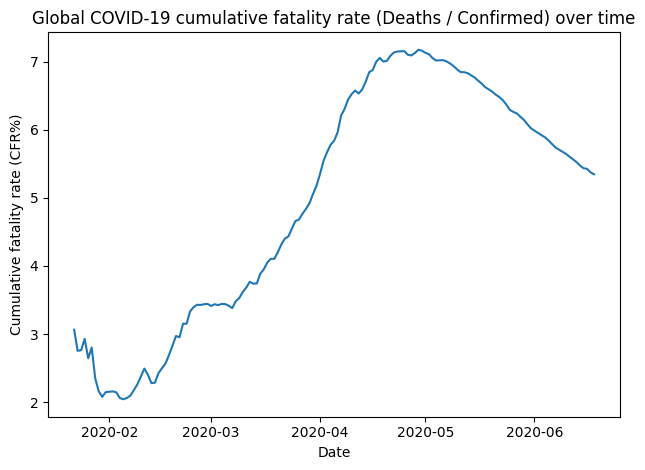

In [20]:
"""
Compute and plot the global cumulative Case Fatality Rate (CFR) over time.

This block creates a new column `CFR_%` in the `day_wise` DataFrame, where CFR is
calculated as (Deaths / Confirmed) * 100 for each date. To avoid division by zero,
the CFR is set to NaN when `Confirmed` is 0.

It then produces a line plot of `CFR_%` against `Date` to visualize how the
global cumulative fatality rate changes over time.

Expected columns in `day_wise`:
- 'Date': date/time values (ideally already converted to datetime)
- 'Confirmed': cumulative confirmed cases (non-negative)
- 'Deaths': cumulative deaths (non-negative)

Returns:
- None (displays the plot).
"""


day_wise["CFR_%"] = np.where(day_wise["Confirmed"] > 0, (day_wise["Deaths"] / day_wise["Confirmed"]) * 100, np.nan)
# Plot 1: Cumulative CFR over time
plt.figure()
plt.plot(day_wise["Date"], day_wise["CFR_%"])
plt.xlabel("Date")
plt.ylabel("Cumulative fatality rate (CFR%)")
plt.title("Global COVID-19 cumulative fatality rate (Deaths / Confirmed) over time")
plt.tight_layout()
plt.show()

In [21]:
day_wise

Date  Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
0   2020-01-22        555      17         28      510          0           0   
1   2020-01-23        654      18         30      606         99           1   
2   2020-01-24        941      26         36      879        287           8   
3   2020-01-25       1434      42         39     1353        493          16   
4   2020-01-26       2118      56         52     2010        684          14   
..         ...        ...     ...        ...      ...        ...         ...   
144 2020-06-14    7911685  433375    3715556  3762754     133545        3344   
145 2020-06-15    8033720  436883    3794955  3801882     122035        3508   
146 2020-06-16    8173199  443669    3892350  3837180     139479        6786   
147 2020-06-17    8349209  448943    4009755  3890511     176010        5274   
148 2020-06-18    8488235  453965    4090382  3943888     139026        5022   

     New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0                0                3.06                   5.05   
1                2                2.75                   4.59   
2                6                2.76                   3.83   
3                3                2.93                   2.72   
4               13                2.64                   2.46   
..             ...                 ...                    ...   
144          69958                5.48                  46.96   
145          79399                5.44                  47.24   
146          97395                5.43                  47.62   
147         117405                5.38                  48.03   
148          80627                5.35                  48.19   

     Deaths / 100 Recovered  No. of countries     CFR_%  
0                     60.71                 6  3.063063  
1                     60.00                 8  2.752294  
2                     72.22                 9  2.763018  
3                    107.69                11  2.928870  
4                    107.69                13  2.644004  
..                      ...               ...       ...  
144                   11.66               187  5.477657  
145                   11.51               187  5.438116  
146                   11.40               187  5.428340  
147                   11.20               187  5.377072  
148                   11.10               187  5.348167  

[149 rows x 13 columns]

## Top Countries

In [22]:
def plot_hbar(df, col, n):
    """
    Plot a horizontal bar chart of the top `n` countries by a chosen numeric column.

    This function sorts the input DataFrame by `col`, selects the largest `n` rows,
    and visualizes them as a horizontal bar chart using Plotly Express. Bars are
    colored by WHO Region, and the value labels are displayed on the bars.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame that must contain at least the columns:
        - "Country/Region"
        - "WHO Region"
        - `col` (the metric to plot)
    col : str
        Name of the numeric column to rank countries by (e.g., "Confirmed", "Deaths",
        "Recovered", "Active").
    n : int
        Number of top countries to display (top `n` highest values of `col`).

    Returns
    -------
    None
        Displays an interactive Plotly figure.

    Notes
    -----
    - The chart is built from `df.sort_values(col).tail(n)`, so it always shows the
      highest `n` values for the selected metric.
    - Text labels may be hidden automatically for readability when bars are small
      or crowded (via `uniformtext_mode='hide'`).
    """
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [23]:
plot_hbar(country_wise, 'Confirmed', 10 )

In [24]:
plot_hbar(country_wise, 'Deaths', 10 )

In [25]:
plot_hbar(country_wise, 'Recovered', 10 )

In [26]:
plot_hbar(country_wise, 'Active', 10 )

## Increase of Corona cases after a certain threshold value 

Checking the increase of corona spread after 1,000,000 cases. 

In [27]:
def epidemic_spread_rate(threshold):
    """
    Plot the epidemic spread rate (cumulative confirmed cases) for countries that
    have reached a specified minimum number of confirmed cases.

    This function filters the global time-series dataset (`full_grouped`) to include
    only records where a country's cumulative confirmed cases are greater than or
    equal to `threshold`. For each selected country, it computes a relative time axis
    called "Days Since Threshold", defined as the number of days since the first date
    that country met the threshold. It then produces an interactive Plotly line chart
    showing cumulative confirmed cases versus days since threshold, with one line per
    country.

    Parameters
    ----------
    threshold : int or float
        Minimum cumulative confirmed-case count required for a country to be included
        in the plot (e.g., 100, 1000).

    Returns
    -------
    None
        Displays an interactive Plotly line chart.

    Notes
    -----
    - Expects a pandas DataFrame named `full_grouped` in the outer scope with at least
      the following columns:
        * 'Country/Region'
        * 'Date' (datetime-like)
        * 'Confirmed' (numeric)
    - The computed "Days Since Threshold" aligns outbreaks across countries by
      comparing their growth from a common starting point (the threshold date).
    - The function modifies a filtered DataFrame slice; if you want to avoid
      SettingWithCopy warnings, consider adding: `filtered = filtered.copy()`.
    """
    # Filter countries that have crossed the threshold
    filtered = full_grouped[full_grouped['Confirmed'] >= threshold]
    
    # Calculate days since threshold
    filtered['Days Since Threshold'] = (filtered['Date'] - 
                                       filtered.groupby('Country/Region')['Date'].transform('min')).dt.days
    
    # Plotting
    fig = px.line(filtered, x='Days Since Threshold', y='Confirmed', 
                  color='Country/Region', 
                  title=f'Epidemic Spread Rate (Countries with >={threshold} cases)',
                  labels={'Confirmed': 'Cumulative Confirmed Cases'})
    figsize = (800, 600)
    fig.update_layout(width=figsize[0], height=figsize[1])
    fig.show()

In [28]:
epidemic_spread_rate(100000)

C:\Users\Acer.LAPTOP-TH13B70O\AppData\Local\Temp\ipykernel_33336\202726164.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Life Expectancy VS Covid Fatality Rate

In [29]:
data_2019 = pd.read_csv(r'D:\CLASSROOM\Data Handling and Visualisation\Assignment2\data\2019.csv')
data_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [30]:
# Prepare life expectancy (World Happiness 2019 uses "Healthy life expectancy" as a score, not years)
data_2019 = data_2019.rename(columns={"Country or region": "Country/Region", "Healthy life expectancy": "Healthy_life_expectancy_index"}).copy()
#print(data_2019.head())

# Basic cleaning
worldometer_data["Country/Region"] = worldometer_data["Country/Region"].astype(str).str.strip()
data_2019["Country/Region"] = data_2019["Country/Region"].astype(str).str.strip()

# Common country-name fixes between the two sources
name_map = {
    "United States": "US",
    "Czech Republic": "Czechia",
    "Taiwan": "Taiwan*",
    "Hong Kong": "Hong Kong",
    "North Macedonia": "North Macedonia",
    "South Korea": "Korea, South",
    "Russia": "Russia",
    "Venezuela": "Venezuela",
    "Bolivia": "Bolivia",
    "Iran": "Iran",
    "Syria": "Syria",
    "Laos": "Laos",
    "Moldova": "Moldova",
    "Tanzania": "Tanzania",
    "Palestinian Territories": "West Bank and Gaza",
}
data_2019["Country_for_merge"] = data_2019["Country/Region"].replace(name_map)


In [31]:
data_2019

Overall rank            Country/Region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy_life_expectancy_index  \
0             1.587                          0.986   
1             1.573                          0.996   
2             1.582                          1.028   
3             1.624                          1.026   
4             1.522                          0.999   
..              ...                            ...   
151           0.711                          0.614   
152           0.885                          0.499   
153           0.517                          0.361   
154           0.000                          0.105   
155           0.575                          0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.596       0.153                      0.393   
1                           0.592       0.252                      0.410   
2                           0.603       0.271                      0.341   
3                           0.591       0.354                      0.118   
4                           0.557       0.322                      0.298   
..                            ...         ...                        ...   
151                         0.555       0.217                      0.411   
152                         0.417       0.276                      0.147   
153                         0.000       0.158                      0.025   
154                         0.225       0.235                      0.035   
155                         0.010       0.202                      0.091   

            Country_for_merge  
0                     Finland  
1                     Denmark  
2                      Norway  
3                     Iceland  
4                 Netherlands  
..                        ...  
151                    Rwanda  
152                  Tanzania  
153               Afghanistan  
154  Central African Republic  
155               South Sudan  

[156 rows x 10 columns]

In [32]:
# Merge
merged = worldometer_data.merge(
    data_2019[["Country_for_merge", "Healthy_life_expectancy_index"]],
    left_on="Country/Region",
    right_on="Country_for_merge",
    how="left"
).drop(columns=["Country_for_merge"])
merged



Country/Region          Continent    Population  TotalCases  \
0                       USA      North America  3.309388e+08     2263749   
1                    Brazil      South America  2.125087e+08      983359   
2                    Russia             Europe  1.459326e+08      569063   
3                     India               Asia  1.379530e+09      381485   
4                        UK             Europe  6.787438e+07      300469   
..                      ...                ...           ...         ...   
204              Seychelles             Africa  9.832700e+04          11   
205              MS Zaandam                  0  0.000000e+00           9   
206          Western Sahara             Africa  5.967100e+05           9   
207  British Virgin Islands      North America  3.022400e+04           8   
208        Papua New Guinea  Australia/Oceania  8.940284e+06           8   

     NewCases  TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  \
0        98.0     120688.0        0.0        931076.0          82.0   
1         0.0      47869.0        0.0        520360.0       16853.0   
2      7972.0       7841.0      181.0        324406.0       10443.0   
3       394.0      12605.0        1.0        205183.0           1.0   
4         0.0      42288.0        0.0             0.0           0.0   
..        ...          ...        ...             ...           ...   
204       0.0          0.0        0.0            11.0           0.0   
205       0.0          2.0        0.0             0.0           0.0   
206       0.0          1.0        0.0             8.0           0.0   
207       0.0          1.0        0.0             7.0           0.0   
208       0.0          0.0        0.0             8.0           0.0   

     ActiveCases  Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  \
0      1211985.0           16503.0            6840.0          365.0   
1       415130.0            8318.0            4627.0          225.0   
2       236816.0            2300.0            3899.0           54.0   
3       163697.0            8944.0             277.0            9.0   
4            0.0             379.0            4427.0          623.0   
..           ...               ...               ...            ...   
204          0.0               0.0             112.0            0.0   
205          7.0               0.0               0.0            0.0   
206          0.0               0.0              15.0            2.0   
207          0.0               0.0             265.0           33.0   
208          0.0               0.0               0.9            0.0   

     TotalTests  Tests/1M pop      WHO Region  Healthy_life_expectancy_index  
0    26724848.0       80755.0        Americas                            NaN  
1     2344437.0       11032.0        Americas                          0.802  
2    16321964.0      111846.0          Europe                          0.726  
3     6426627.0        4659.0  South-EastAsia                          0.588  
4     7259555.0      106956.0          Europe                            NaN  
..          ...           ...             ...                            ...  
204         0.0           0.0          Africa                            NaN  
205         0.0           0.0               0                            NaN  
206         0.0           0.0          Africa                            NaN  
207       212.0        7014.0               0                            NaN  
208      5281.0         591.0  WesternPacific                            NaN  

[209 rows x 17 columns]

In [33]:
# How many matched?
match_rate = pd.DataFrame({
    "metric": ["covid_countries", "life_rows", "matched_countries_with_life_index"],
    "value": [worldometer_data["Country/Region"].nunique(), data_2019["Country/Region"].nunique(), merged["Healthy_life_expectancy_index"].notna().sum()]
})
match_rate

metric  value
0                    covid_countries    209
1                          life_rows    156
2  matched_countries_with_life_index    140

In [34]:
country_wise

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      27532     546       7660   19326        658   
1               Albania       1788      39       1086     663         66   
2               Algeria      11385     811       8078    2496        117   
3               Andorra        855      52        792      11          1   
4                Angola        166       8         64      94         11   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza        600       3        415     182         45   
183      Western Sahara          9       1          8       0          0   
184               Yemen        909     248        273     388          7   
185              Zambia       1416      11       1144     261          4   
186            Zimbabwe        463       4         63     396         62   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            42           1502                1.98                  27.82   
1             1              9                2.18                  60.74   
2            12            135                7.12                  70.95   
3             0              1                6.08                  92.63   
4             1              0                4.82                  38.55   
..          ...            ...                 ...                    ...   
182           0              0                0.50                  69.17   
183           0              0               11.11                  88.89   
184           4              2               27.28                  30.03   
185           0              2                0.78                  80.79   
186           0              0                0.86                  13.61   

    Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                     7.13                22890           4642   
1                     3.59                 1385            403   
2                    10.04                10589            796   
3                     6.57                  852              3   
4                     12.5                  118             48   
..                     ...                  ...            ...   
182                   0.72                  487            113   
183                   12.5                    9              0   
184                  90.84                  591            318   
185                   0.96                 1200            216   
186                   6.35                  332            131   

     1 week % increase             WHO Region  
0                20.28  Eastern Mediterranean  
1                29.10                 Europe  
2                 7.52                 Africa  
3                 0.35                 Europe  
4                40.68                 Africa  
..                 ...                    ...  
182              23.20  Eastern Mediterranean  
183               0.00                 Africa  
184              53.81  Eastern Mediterranean  
185              18.00                 Africa  
186              39.46                 Africa  

[187 rows x 15 columns]

In [35]:

# Make sure the country key column matches your merged_df
# (country_wise_latest has 'Country/Region', so keep it)
country_wise["Country/Region"] = country_wise["Country/Region"].astype("string").str.strip()

# 2) Calculate CFR% = Deaths / Confirmed * 100
country_wise["Confirmed"] = pd.to_numeric(country_wise["Confirmed"], errors="coerce")
country_wise["Deaths"] = pd.to_numeric(country_wise["Deaths"], errors="coerce")

country_wise["CFR_%"] = np.where(
    country_wise["Confirmed"] > 0,
    (country_wise["Deaths"] / country_wise["Confirmed"]) * 100,
    np.nan
)

# Keep only the columns you want to add (you can add more if needed)
country_wise_small = country_wise[
    ["Country/Region", "Confirmed", "Deaths", "Recovered", "Active", "CFR_%"]
].copy()

# 3) Merge with your merged_df (worldometer + 2019 life expectancy)
merged["Country/Region"] = merged["Country/Region"].astype("string").str.strip()

final_merged = merged.merge(
    country_wise_small,
    on="Country/Region",
    how="left"
)

final_merged

Country/Region          Continent    Population  TotalCases  \
0                       USA      North America  3.309388e+08     2263749   
1                    Brazil      South America  2.125087e+08      983359   
2                    Russia             Europe  1.459326e+08      569063   
3                     India               Asia  1.379530e+09      381485   
4                        UK             Europe  6.787438e+07      300469   
..                      ...                ...           ...         ...   
204              Seychelles             Africa  9.832700e+04          11   
205              MS Zaandam                  0  0.000000e+00           9   
206          Western Sahara             Africa  5.967100e+05           9   
207  British Virgin Islands      North America  3.022400e+04           8   
208        Papua New Guinea  Australia/Oceania  8.940284e+06           8   

     NewCases  TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  \
0        98.0     120688.0        0.0        931076.0          82.0   
1         0.0      47869.0        0.0        520360.0       16853.0   
2      7972.0       7841.0      181.0        324406.0       10443.0   
3       394.0      12605.0        1.0        205183.0           1.0   
4         0.0      42288.0        0.0             0.0           0.0   
..        ...          ...        ...             ...           ...   
204       0.0          0.0        0.0            11.0           0.0   
205       0.0          2.0        0.0             0.0           0.0   
206       0.0          1.0        0.0             8.0           0.0   
207       0.0          1.0        0.0             7.0           0.0   
208       0.0          0.0        0.0             8.0           0.0   

     ActiveCases  ...  Deaths/1M pop  TotalTests  Tests/1M pop  \
0      1211985.0  ...          365.0  26724848.0       80755.0   
1       415130.0  ...          225.0   2344437.0       11032.0   
2       236816.0  ...           54.0  16321964.0      111846.0   
3       163697.0  ...            9.0   6426627.0        4659.0   
4            0.0  ...          623.0   7259555.0      106956.0   
..           ...  ...            ...         ...           ...   
204          0.0  ...            0.0         0.0           0.0   
205          7.0  ...            0.0         0.0           0.0   
206          0.0  ...            2.0         0.0           0.0   
207          0.0  ...           33.0       212.0        7014.0   
208          0.0  ...            0.0      5281.0         591.0   

         WHO Region  Healthy_life_expectancy_index Confirmed   Deaths  \
0          Americas                            NaN       NaN      NaN   
1          Americas                          0.802  978142.0  47748.0   
2            Europe                          0.726  560321.0   7650.0   
3    South-EastAsia                          0.588  380532.0  12573.0   
4            Europe                            NaN       NaN      NaN   
..              ...                            ...       ...      ...   
204          Africa                            NaN      11.0      0.0   
205               0                            NaN       NaN      NaN   
206          Africa                            NaN       9.0      1.0   
207               0                            NaN       NaN      NaN   
208  WesternPacific                            NaN       8.0      0.0   

     Recovered    Active      CFR_%  
0          NaN       NaN        NaN  
1     534580.0  395814.0   4.881500  
2     313409.0  239262.0   1.365289  
3     204711.0  163248.0   3.304059  
4          NaN       NaN        NaN  
..         ...       ...        ...  
204       11.0       0.0   0.000000  
205        NaN       NaN        NaN  
206        8.0       0.0  11.111111  
207        NaN       NaN        NaN  
208        8.0       0.0   0.000000  

[209 rows x 22 columns]

In [36]:
"""
Create a scatter plot showing the relationship between healthy life expectancy and COVID-19 fatality rate (CFR%),
colored by WHO region.

This block:
1) Detects the WHO Region column in `final_merged` safely (case-insensitive search for "who region").
   - Raises a ValueError if no matching column exists, to avoid silent plotting errors.
2) Ensures the plotting variables are numeric by coercing:
   - `Healthy_life_expectancy_index`
   - `CFR_%`
   Non-numeric values are converted to NaN.
3) Filters the data to rows with non-missing values for:
   - healthy life expectancy index
   - CFR%
   - WHO region
4) Builds an interactive Plotly scatter plot:
   - x-axis: Healthy life expectancy (index)
   - y-axis: Fatality Rate (CFR%)
   - color: WHO region
   - hover label: country/region name (if available)

Expected input:
- `final_merged` (pd.DataFrame): merged dataset containing life expectancy and COVID outcome metrics.
  Must include `Healthy_life_expectancy_index`, `CFR_%`, and a WHO region column.

Output:
- Displays an interactive Plotly figure via `fig.show()`.

Raises:
- ValueError: if no WHO region column is found in `final_merged`.
"""

# --- Detect the WHO Region column safely ---
who_candidates = [c for c in final_merged.columns if "who region" in c.lower()]
if not who_candidates:
    raise ValueError(f"No WHO Region column found. Columns: {list(final_merged.columns)}")
who_col = who_candidates[0]   # e.g., "WHO Region" or "WHO Region_latest"

# --- Ensure numeric types (important for plotting) ---
final_merged = final_merged.copy()
final_merged["Healthy_life_expectancy_index"] = pd.to_numeric(final_merged["Healthy_life_expectancy_index"], errors="coerce")
final_merged["CFR_%"] = pd.to_numeric(final_merged["CFR_%"], errors="coerce")

# Filter valid rows
plot_df = final_merged.dropna(subset=["Healthy_life_expectancy_index", "CFR_%", who_col]).copy()

# --- Plot ---
fig = px.scatter(
    plot_df,
    x="Healthy_life_expectancy_index",
    y="CFR_%",
    color=who_col,
    hover_name="Country/Region" if "Country/Region" in plot_df.columns else None,
    title="Healthy Life Expectancy vs Fatality Rate (CFR%) — colored by WHO Region",
    labels={
        "Healthy_life_expectancy_index": "Healthy life expectancy (index)",
        "CFR_%": "Fatality Rate (CFR%)",
        who_col: "WHO Region"
    }
)

fig.show()


## Confirmed cases vs Total Deaths

In [37]:
temp_wordometer = worldometer_data[worldometer_data['WHO Region']!=0]  
fig = px.scatter(temp_wordometer, x='TotalCases', y='TotalDeaths', color='WHO Region', 
                 height=700, hover_name='Country/Region', log_x=True, log_y=True, 
                 title='Confirmed vs Deaths',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## Dashboard View

The dashboard view aggregates the trends of the pandemic in a dynamic view, where switching between the tabs gives insights on global trends, country comparisions,CFR's relationship and the WHO region wise trend.

In [38]:
"""
Data cleaning and standardisation pipeline for multiple COVID-19 datasets.

This code defines small helper functions and then applies them to prepare
`day_wise`, `full_grouped`, `worldometer_data`, and an optional COVID+life
expectancy dataset (`final_merged`) for consistent analysis and merging.

What it does
------------
1) Helper utilities
   - `to_datetime(df, col)`: coerces a column to pandas datetime and drops rows
     where conversion fails (NaT).
   - `ensure_numeric(df, cols)`: coerces selected columns to numeric (invalid
     parses become NaN).
   - `find_col(df, wanted)`: finds an exact column match ignoring case and
     whitespace, useful when column naming varies across files.

2) Date cleaning and ordering
   - Converts "Date" in `day_wise` and `full_grouped` to datetime, drops invalid
     rows, sorts chronologically, and resets index.

3) Country column standardisation
   - Detects country column in `full_grouped` and `worldometer_data` (supports
     "Country/Region" or "Country"), renames to a common "Country", strips
     whitespace, and validates presence (raises KeyError if missing).

4) Numeric coercion for key COVID metrics
   - Ensures core numeric COVID columns (Confirmed, Deaths, Recovered, Active,
     and daily new metrics) are numeric for both `day_wise` and `full_grouped`.

5) Optional life expectancy merge preparation
   - Uses `final_merged` (assigned to `life_df`) if available.
   - Standardises country column to "Country/Region" if needed.
   - Attempts to standardise the healthy life expectancy column name to
     "Healthy_life_expectancy_index".
   - Ensures numeric types for Confirmed, Deaths, CFR_%, and life expectancy.
   - Computes CFR_% if missing and Confirmed/Deaths exist.

6) WHO region extraction and merge
   - Renames the WHO region column in `worldometer_data` to "WHO Region" if found;
     otherwise creates it as NaN.
   - Merges WHO Region into `full_grouped` to create `fg_region` for region-based
     views/plots.

Inputs (expected in the environment)
------------------------------------
day_wise : pd.DataFrame
    Daily global COVID-19 totals (must include a Date column and standard metrics).
full_grouped : pd.DataFrame
    Daily country-level COVID-19 data (must include Date and a country column).
worldometer_data : pd.DataFrame
    Country-level snapshot including WHO Region and country name column.
final_merged : pd.DataFrame or None
    Optional dataset merging COVID outcomes with life expectancy information.
np : numpy
    Required for CFR_% computation with `np.where`.

Outputs (created/modified)
--------------------------
day_wise : pd.DataFrame
    Cleaned, dated, numeric-coerced global daily dataset.
full_grouped : pd.DataFrame
    Cleaned, dated, numeric-coerced country daily dataset with "Country" column.
worldometer_data : pd.DataFrame
    Standardised to include "Country" and "WHO Region" columns.
life_df : pd.DataFrame or None
    Cleaned optional life expectancy merged dataset (if provided).
fg_region : pd.DataFrame
    `full_grouped` merged with WHO Region for region-level analysis.

Notes
-----
- Date parsing uses `errors="coerce"` and then drops invalid dates.
- Numeric coercion uses `errors="coerce"` to safely handle messy inputs.
- CFR_% is computed only when Confirmed > 0 to avoid division by zero.
"""


def to_datetime(df, col="Date"):
    df = df.copy()
    df[col] = pd.to_datetime(df[col], errors="coerce")
    return df.dropna(subset=[col])

def ensure_numeric(df, cols):
    df = df.copy()
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def find_col(df, wanted):
    wanted_norm = wanted.strip().lower().replace(" ", "")
    for c in df.columns:
        c_norm = c.strip().lower().replace(" ", "")
        if c_norm == wanted_norm:
            return c
    return None


# Clean dates
day_wise = to_datetime(day_wise, "Date").sort_values("Date").reset_index(drop=True)
full_grouped = to_datetime(full_grouped, "Date").sort_values("Date").reset_index(drop=True)

# Standardize country columns
fg_country_col = find_col(full_grouped, "Country/Region") or find_col(full_grouped, "Country")
wm_country_col = find_col(worldometer_data, "Country/Region") or find_col(worldometer_data, "Country")
if fg_country_col is None:
    raise KeyError(f"No country column found in full_grouped. Columns: {list(full_grouped.columns)}")
if wm_country_col is None:
    raise KeyError(f"No country column found in worldometer_data. Columns: {list(worldometer_data.columns)}")
full_grouped = full_grouped.rename(columns={fg_country_col: "Country"}).copy()
worldometer_data = worldometer_data.rename(columns={wm_country_col: "Country"}).copy()
full_grouped["Country"] = full_grouped["Country"].astype("string").str.strip()
worldometer_data["Country"] = worldometer_data["Country"].astype("string").str.strip()
# Numeric columns
dw_num = ["Confirmed","Deaths","Recovered","Active","New cases","New deaths","New recovered"]
fg_num = ["Confirmed","Deaths","Recovered","Active","New cases","New deaths","New recovered"]
day_wise = ensure_numeric(day_wise, dw_num)
full_grouped = ensure_numeric(full_grouped, fg_num)

# Load optional COVID + life expectancy merge
life_df = final_merged

if life_df is not None:
    who_candidates = [c for c in life_df.columns if "who region" in c.lower()]
    who_life_col = who_candidates[0] if who_candidates else None

    if "Country/Region" not in life_df.columns and "Country" in life_df.columns:
        life_df = life_df.rename(columns={"Country":"Country/Region"})

    # Try to standardize life expectancy column name
    if "Healthy_life_expectancy_index" not in life_df.columns:
        alt = [c for c in life_df.columns if "healthy" in c.lower() and "expect" in c.lower()]
        if alt:
            life_df = life_df.rename(columns={alt[0]: "Healthy_life_expectancy_index"})

    life_df["Country/Region"] = life_df["Country/Region"].astype("string").str.strip()
    life_df = ensure_numeric(life_df, ["Confirmed","Deaths","CFR_%","Healthy_life_expectancy_index"])

    if "CFR_%" not in life_df.columns and ("Confirmed" in life_df.columns and "Deaths" in life_df.columns):
        life_df["CFR_%"] = np.where(life_df["Confirmed"]>0, (life_df["Deaths"]/life_df["Confirmed"])*100, np.nan)
else:
    who_life_col = None

print("Loaded:")
print("- day_wise:", day_wise.shape)
print("- full_grouped:", full_grouped.shape)
print("- worldometer_data:", worldometer_data.shape)
print("- covid_with_life_expectancy_2019:", None if life_df is None else life_df.shape)

# WHO region mapping
who_col = find_col(worldometer_data, "WHO Region")
if who_col:
    worldometer_data = worldometer_data.rename(columns={who_col: "WHO Region"})
else:
    worldometer_data["WHO Region"] = np.nan
# Merge WHO region into full_grouped for region view
fg_region = full_grouped.merge(worldometer_data[["Country","WHO Region"]], on="Country", how="left")
fg_region["WHO Region"] = fg_region["WHO Region_x"]
fg_region = fg_region.drop(columns=["WHO Region_x", "WHO Region_y"])

Loaded:
- day_wise: (149, 13)
- full_grouped: (27860, 10)
- worldometer_data: (209, 16)
- covid_with_life_expectancy_2019: (209, 22)


In [39]:
life_df

Country/Region          Continent    Population  TotalCases  \
0                       USA      North America  3.309388e+08     2263749   
1                    Brazil      South America  2.125087e+08      983359   
2                    Russia             Europe  1.459326e+08      569063   
3                     India               Asia  1.379530e+09      381485   
4                        UK             Europe  6.787438e+07      300469   
..                      ...                ...           ...         ...   
204              Seychelles             Africa  9.832700e+04          11   
205              MS Zaandam                  0  0.000000e+00           9   
206          Western Sahara             Africa  5.967100e+05           9   
207  British Virgin Islands      North America  3.022400e+04           8   
208        Papua New Guinea  Australia/Oceania  8.940284e+06           8   

     NewCases  TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  \
0        98.0     120688.0        0.0        931076.0          82.0   
1         0.0      47869.0        0.0        520360.0       16853.0   
2      7972.0       7841.0      181.0        324406.0       10443.0   
3       394.0      12605.0        1.0        205183.0           1.0   
4         0.0      42288.0        0.0             0.0           0.0   
..        ...          ...        ...             ...           ...   
204       0.0          0.0        0.0            11.0           0.0   
205       0.0          2.0        0.0             0.0           0.0   
206       0.0          1.0        0.0             8.0           0.0   
207       0.0          1.0        0.0             7.0           0.0   
208       0.0          0.0        0.0             8.0           0.0   

     ActiveCases  ...  Deaths/1M pop  TotalTests  Tests/1M pop  \
0      1211985.0  ...          365.0  26724848.0       80755.0   
1       415130.0  ...          225.0   2344437.0       11032.0   
2       236816.0  ...           54.0  16321964.0      111846.0   
3       163697.0  ...            9.0   6426627.0        4659.0   
4            0.0  ...          623.0   7259555.0      106956.0   
..           ...  ...            ...         ...           ...   
204          0.0  ...            0.0         0.0           0.0   
205          7.0  ...            0.0         0.0           0.0   
206          0.0  ...            2.0         0.0           0.0   
207          0.0  ...           33.0       212.0        7014.0   
208          0.0  ...            0.0      5281.0         591.0   

         WHO Region  Healthy_life_expectancy_index Confirmed   Deaths  \
0          Americas                            NaN       NaN      NaN   
1          Americas                          0.802  978142.0  47748.0   
2            Europe                          0.726  560321.0   7650.0   
3    South-EastAsia                          0.588  380532.0  12573.0   
4            Europe                            NaN       NaN      NaN   
..              ...                            ...       ...      ...   
204          Africa                            NaN      11.0      0.0   
205               0                            NaN       NaN      NaN   
206          Africa                            NaN       9.0      1.0   
207               0                            NaN       NaN      NaN   
208  WesternPacific                            NaN       8.0      0.0   

     Recovered    Active      CFR_%  
0          NaN       NaN        NaN  
1     534580.0  395814.0   4.881500  
2     313409.0  239262.0   1.365289  
3     204711.0  163248.0   3.304059  
4          NaN       NaN        NaN  
..         ...       ...        ...  
204       11.0       0.0   0.000000  
205        NaN       NaN        NaN  
206        8.0       0.0  11.111111  
207        NaN       NaN        NaN  
208        8.0       0.0   0.000000  

[209 rows x 22 columns]

In [40]:
fg_region


Date      Country  Confirmed  Deaths  Recovered  Active  \
0     2020-01-22  Afghanistan          0       0          0       0   
1     2020-01-22  Netherlands          0       0          0       0   
2     2020-01-22  New Zealand          0       0          0       0   
3     2020-01-22    Nicaragua          0       0          0       0   
4     2020-01-22        Niger          0       0          0       0   
...          ...          ...        ...     ...        ...     ...   
27855 2020-06-18      Georgia        893      14        739     140   
27856 2020-06-18      Germany     189817    8875     173847    7095   
27857 2020-06-18        Ghana      12929      66       4468    8395   
27858 2020-06-18     Eswatini        586       4        267     315   
27859 2020-06-18     Zimbabwe        463       4         63     396   

       New cases  New deaths  New recovered             WHO Region  
0              0           0              0  Eastern Mediterranean  
1              0           0              0                 Europe  
2              0           0              0        Western Pacific  
3              0           0              0               Americas  
4              0           0              0                 Africa  
...          ...         ...            ...                    ...  
27855          5           0              8                 Europe  
27856       1213          24            248                 Europe  
27857        339           0             58                 Africa  
27858         23           0              5                 Africa  
27859         62           0              0                 Africa  

[27860 rows x 10 columns]

In [41]:
"""
Interactive COVID-19 Dashboard (Jupyter + Plotly + ipywidgets)

This code builds a 4-tab interactive dashboard to explore COVID-19 trends using
Plotly for visualization and ipywidgets for controls. The dashboard is intended
to be run inside a Jupyter Notebook/Lab environment.

Tabs / Views
------------
1)  Global trends:
   - Plots a selected global metric over time from `day_wise` (day_wise.csv).
   - Optional log-scale toggle for the y-axis.

2)  Country comparison:
   - Compares a selected metric over time across multiple countries from
     `full_grouped` (full_grouped.csv).
   - Supports either manual selection of countries OR automatic "Top 5" ranking
     based on the latest date for the chosen metric.
   - Optional log-scale toggle for the y-axis.

3)  CFR + Life expectancy:
   - Scatterplot relating 2019 healthy life expectancy (index) to a COVID outcome
     such as CFR, deaths, or confirmed cases.
   - Uses `life_df` (e.g., covid_with_life_expectancy_2019.csv) if available.
   - Optional filter by WHO region (if a WHO region column is present).

4)  WHO region view:
   - Aggregates daily metrics by WHO region (sum across countries) using `fg_region`.
   - Allows selecting one or more WHO regions and a metric to plot over time.

Key Features
------------
- Global Plotly defaults are set (template, width, height).
- `nice_fig()` applies consistent styling: larger canvas, unified hover, and
  a right-side vertical legend.
- Helper functions `section_title()` and `hint()` render nicely formatted HTML
  headings and guidance text within each tab.
- All plots are reactive: changing a widget triggers redrawing of the relevant tab.

Expected Inputs / DataFrames
----------------------------
The following pandas DataFrames must exist in the notebook before running:
- day_wise: global daily time series with a 'Date' column and metric columns
  (e.g., Confirmed, Deaths, Recovered, Active, New cases, etc.).
- full_grouped: country-level daily time series with columns:
  'Country', 'Date', and selected metric columns.
- fg_region: daily dataset including a WHO region column and 'Date' plus metrics.
- life_df (optional): merged dataset containing:
  'Healthy_life_expectancy_index' and outcome columns (e.g., CFR_%, Deaths, Confirmed),
  and optionally a WHO region column (referenced by `who_life_col`).

Notes
-----
- The "Top 5" option ranks countries using the chosen metric on the latest
  available date in `full_grouped`.
- WHO region column name is resolved dynamically to handle variants such as
  'WHO Region_x' or 'WHO Region_y'.
- Designed for exploratory analysis; for publication-quality outputs, consider
  exporting figures or refining layout/annotations.

Dependencies
------------
- pandas as pd
- plotly.express as px
- ipywidgets as widgets
- IPython.display import display

"""

# ---------------------------
# Global Plotly style
# ---------------------------
px.defaults.template = "plotly_white"
px.defaults.width = 950
px.defaults.height = 500

def nice_fig(fig, legend_title=None):
    fig.update_layout(
        width=1100,
        height=600,
        margin=dict(l=70, r=240, t=90, b=70),  # extra space on right for legend
        title=dict(x=0.02, xanchor="left", y=0.98, yanchor="top"),
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.02,
            title_text=legend_title
        ),
        hovermode="x unified"
    )
    return fig

def section_title(text):
    return widgets.HTML(f"""
    <div style="font-size:18px; font-weight:700; margin:6px 0 10px 0;">
        {text}
    </div>
    """)

def hint(text):
    return widgets.HTML(f"""
    <div style="color:#666; font-size:12px; margin-top:-6px; margin-bottom:8px;">
        {text}
    </div>
    """)

# ---------------------------
# Dashboard (4 tabs)
# ---------------------------
out_global = widgets.Output()
out_country = widgets.Output()
out_life = widgets.Output()
out_region = widgets.Output()

tabs = widgets.Tab(children=[out_global, out_country, out_life, out_region])
tabs.set_title(0, "🌍 Global trends")
tabs.set_title(1, "🏳️ Country comparison")
tabs.set_title(2, "❤️ CFR + Life expectancy")
tabs.set_title(3, "🗺️ WHO region view")

# ===========================
# Tab 1: Global trends
# ===========================
global_metric = widgets.Dropdown(
    options=[
        "Confirmed","Deaths","Recovered","Active",
        "New cases","New deaths","New recovered",
        "Deaths / 100 Cases","Recovered / 100 Cases","Deaths / 100 Recovered"
    ],
    value="Confirmed",
    description="Metric:",
    layout=widgets.Layout(width="320px")
)

global_log = widgets.Checkbox(value=False, description="Log scale")
global_controls = widgets.HBox([global_metric, global_log], layout=widgets.Layout(gap="16px"))

def draw_global(*_):
    with out_global:
        out_global.clear_output()
        display(section_title("Global trend over time"))
        display(hint("Choose a metric from day_wise. If you want 7-day averages, compute them first and add them to the dropdown."))
        display(global_controls)

        col = global_metric.value
        if col not in day_wise.columns:
            print(f"Column '{col}' not found in day_wise.csv")
            return

        fig = px.line(day_wise, x="Date", y=col, title=f"Global: {col}")
        if global_log.value:
            fig.update_yaxes(type="log")
        fig = nice_fig(fig, legend_title=None)
        fig.show()

global_metric.observe(draw_global, names="value")
global_log.observe(draw_global, names="value")

# ===========================
# Tab 2: Country comparison
# ===========================
all_countries = sorted(full_grouped["Country"].dropna().unique().tolist())

country_pick = widgets.SelectMultiple(
    options=all_countries,
    value=tuple(all_countries[:5]),
    description="Countries:",
    layout=widgets.Layout(width="420px", height="170px")
)

country_metric = widgets.Dropdown(
    options=["Confirmed","Deaths","Recovered","Active","New cases","New deaths","New recovered"],
    value="Confirmed",
    description="Metric:",
    layout=widgets.Layout(width="260px")
)

country_log = widgets.Checkbox(value=False, description="Log scale")
top5_only = widgets.Checkbox(value=False, description="Top 5")
country_note = widgets.HTML("<div style='font-size:12px;color:#666'>Tip: check <b>Top 5</b> to ignore manual selection.</div>")

country_controls = widgets.HBox([
    country_pick,
    widgets.VBox([country_metric, country_log, top5_only, country_note])
], layout=widgets.Layout(gap="20px"))

def draw_country(*_):
    with out_country:
        out_country.clear_output()
        display(section_title("Compare countries over time"))
        display(hint("Manual selection or Top 5 ranked by the latest date for the chosen metric."))
        display(country_controls)

        col = country_metric.value

        if top5_only.value:
            latest_date = full_grouped["Date"].max()
            latest = full_grouped[full_grouped["Date"] == latest_date].copy()

            top5 = (latest.groupby("Country", as_index=False)[col].sum()
                           .sort_values(col, ascending=False)
                           .head(5)["Country"]
                           .tolist())

            d = full_grouped[full_grouped["Country"].isin(top5)].copy()
            d = d.groupby(["Country", "Date"], as_index=False)[col].sum()

            # legend order = ranked top10 (not alphabetical)
            d["Country"] = pd.Categorical(d["Country"], categories=top5, ordered=True)
            d = d.sort_values(["Country", "Date"])

            fig = px.line(
                d, x="Date", y=col, color="Country",
                title=f"Top 5 countries by {col} (ranked on {latest_date.date()})",
                category_orders={"Country": top5}
            )
            fig = nice_fig(fig, legend_title="Country")

        else:
            countries = list(country_pick.value)
            if not countries:
                print("Pick at least 1 country OR enable Top 5.")
                return

            d = full_grouped[full_grouped["Country"].isin(countries)].copy()
            d = d.groupby(["Country", "Date"], as_index=False)[col].sum()

            fig = px.line(d, x="Date", y=col, color="Country", title=f"Selected countries: {col}")
            fig = nice_fig(fig, legend_title="Country")

        if country_log.value:
            fig.update_yaxes(type="log")

        fig.show()

country_pick.observe(draw_country, names="value")
country_metric.observe(draw_country, names="value")
country_log.observe(draw_country, names="value")
top5_only.observe(draw_country, names="value")

# ===========================
# Tab 3: CFR + Life expectancy
# ===========================
if life_df is not None:
    life_y = widgets.Dropdown(
        options=["CFR_%","Deaths","Confirmed"],
        value="CFR_%",
        description="Y:",
        layout=widgets.Layout(width="220px")
    )

    if who_life_col is not None:
        regions = ["All"] + sorted(life_df[who_life_col].dropna().astype(str).unique().tolist())
    else:
        regions = ["All"]

    region_filter = widgets.Dropdown(
        options=regions,
        value="All",
        description="Region:",
        layout=widgets.Layout(width="320px")
    )

    life_controls = widgets.HBox([life_y, region_filter], layout=widgets.Layout(gap="16px"))
else:
    life_controls = widgets.HTML(
        "<b>Missing file:</b> covid_with_life_expectancy_2019.csv. Create it first to enable this tab."
    )

def draw_life(*_):
    with out_life:
        out_life.clear_output()
        display(section_title("Life expectancy vs COVID outcome"))
        display(hint("Scatterplot uses the 2019 'Healthy life expectancy' index from World Happiness Report (not years)."))
        display(life_controls)

        if life_df is None:
            return

        dfp = life_df.dropna(subset=["Healthy_life_expectancy_index", life_y.value]).copy()
        if who_life_col and region_filter.value != "All":
            dfp = dfp[dfp[who_life_col].astype(str) == str(region_filter.value)]

        fig = px.scatter(
            dfp,
            x="Healthy_life_expectancy_index",
            y=life_y.value,
            color=who_life_col if who_life_col else None,
            hover_name="Country/Region" if "Country/Region" in dfp.columns else None,
            size="Confirmed" if "Confirmed" in dfp.columns else None,
            title=f"Life expectancy vs {life_y.value}",
            labels={
                "Healthy_life_expectancy_index": "Healthy life expectancy (index, 2019)",
                "CFR_%": "Fatality Rate (CFR%)"
            }
        )
        fig = nice_fig(fig, legend_title="WHO Region" if who_life_col else None)
        fig.show()

if life_df is not None:
    life_y.observe(draw_life, names="value")
    region_filter.observe(draw_life, names="value")

# ===========================
# Tab 4: WHO region view
# ===========================
# Resolve WHO region column safely (handles WHO Region_x / WHO Region_y)
region_col = next((c for c in fg_region.columns if "who region" in c.lower()), None)
if region_col is None:
    raise KeyError(f"No WHO Region column found in fg_region. Columns are: {fg_region.columns.tolist()}")

region_metric = widgets.Dropdown(
    options=["Confirmed","Deaths","Recovered","Active","New cases","New deaths","New recovered"],
    value="Confirmed",
    description="Metric:",
    layout=widgets.Layout(width="260px")
)

region_pick = widgets.SelectMultiple(
    options=sorted(fg_region[region_col].dropna().astype(str).unique().tolist()),
    value=tuple(sorted(fg_region[region_col].dropna().astype(str).unique().tolist())[:]),
    description="Regions:",
    layout=widgets.Layout(width="520px", height="170px")
)

region_controls = widgets.HBox([region_pick, region_metric], layout=widgets.Layout(gap="18px"))

def draw_region(*_):
    with out_region:
        out_region.clear_output()
        display(section_title("WHO region trends over time"))
        display(hint("Aggregated by WHO region (sum across countries)."))
        display(region_controls)

        regions = list(region_pick.value)
        col = region_metric.value

        if not regions:
            print("Pick at least 1 WHO region.")
            return

        d = fg_region[fg_region[region_col].astype(str).isin([str(r) for r in regions])].copy()
        d = d.groupby([region_col, "Date"], as_index=False)[col].sum()

        fig = px.line(d, x="Date", y=col, color=region_col, title=f"WHO regions: {col}")
        fig = nice_fig(fig, legend_title="WHO Region")
        fig.show()

region_pick.observe(draw_region, names="value")
region_metric.observe(draw_region, names="value")

# ---------------------------
# Render
# ---------------------------
display(tabs)
draw_global()
draw_country()
draw_life()
draw_region()
